# Phase transition in networks
## Generalities - Networks 1.0
A network is a set of objects (called nodes or vertices) that are connected together. The connections between the nodes are called edges or links. In mathematics, networks are often referred to as graphs. 

In the following, we will only consider undirected networks (i.e. if node $i$ is connected to node $j$, then node $j$ is automatically connected to node $i$ as is the case with Facebook friendships). For unweighted networks of $N$ nodes, the network structure can be represented by an $N \times N$ adjacency matrix $A$:

$$ a_{i,j} = \left\{
                \begin{array}{ll}
                  1 & \text{if there is an edge from node $i$ to node $j$}\\
                  0 & \text{otherwise}\\
                \end{array}
                \right.
$$

The degree of a node degree of a node $i$ is the number of connections it has. In terms of the adjacency matrix
$A$, the degree of node $i$ is the sum of the i$^{\text{th}}$ row of $A$:
$$k_i = \sum_{j=1}^{N}a_{i,j}$$


The average node degree $\langle k \rangle$ is then given by: $$\langle k \rangle = \sum_{i=1}^{N}k_{i}$$


## Erdös-Rényi random graph model
One of the simplest graph models is the Erdös-Rényi random graph model, denoted by $\mathcal{G}(N,p)$ with $N$ being the amount of nodes and $p$ being the probability that a link exists between two nodes. Self-loops are excluded. The value of $p$ is typically small (this is to avoid that the average degree $\langle k \rangle$ depends on $N$, cf. specialised literature for more details). When studying random graph model models, a major aim is to predict the average behaviour of certain network metrics and, if possible, their variance.



The Erdös-Rényi random graph  exhibits a phase transition. Let us consider the size (i.e., number of nodes) of the largest connected component in the network as a function of the mean degree ⟨k⟩. When ⟨k⟩ = 0, the network is trivially composed of N disconnected nodes. In the other extreme of ⟨k⟩ = N − 1, each node pair is adjacent such that the network is trivially connected. Between the two extremes, the network does not change smoothly in terms of the largest component size. Instead, a giant component, i.e., a component whose size is the largest and proportional to N, suddenly appears as ⟨k⟩ increases, marking a phase transition. The goal of this application is to determine this value by simulation.

## Problem solution
We split the problem in a series of subproblems:
* generating a random graph
* determine the average degree
* identifying the size of the largest connected component
* visualising the result
* determine the critical value

In [2]:
using LaTeXStrings
using LinearAlgebra
using Plots
using Statistics


"""
Generate adjacency matrix (bitarray for speed)
"""
function gengraph(N::Int,p)
    if 0 <= p <= 1
        A = rand(N,N) .< p
    else
        error("p should be between 0 and 1")
    end
    A = Symmetric(A)
    # remove self links
    A[diagind(A)] .= 0
    return A
end
    
"""
determine average degree from adjacency matrix
"""
function avdeg(A)
    mean(sum(A,dims=1))
end

"""
Determine largest connected component - lazy recursive
"""
function largecomp(A)
    # find component size
    N = size(A,1)
    # bookkeeping (visited)
    visited = Dict([n=> false for n = 1:N])
    comps = Array{Array{Int,1},1}()
    # go over all nodes
    for i = 1:N
        if ~visited[i]
            push!(comps,crawl(A,i,visited))
        end
    end
    sort(comps, by=length,rev=true)
end
    
function getneighbours(A,n)
    findall(!iszero,A[n,:])
end
    
function crawl(A,i,visited,comp=Array{Int,1}())
    # get neighbours
    neig = getneighbours(A,i)
    # change visited state
    visited[i] = true
    # add to list
    push!(comp,i)  
    # recursion condition
    if length(neig) != 0
        for n in neig
            if ~visited[n]
                crawl(A,n,visited,comp)
            end
        end
    end
    return comp
end
    
# testmatrix
A = [0 1 1 0 0 0;
     1 0 1 1 1 0;
     1 1 0 0 0 0;
     0 1 0 0 0 0;
     0 1 0 0 0 0;
     0 0 0 0 0 0]

@time largecomp(A)

  0.112744 seconds (149.77 k allocations: 7.446 MiB, 22.30% gc time)


2-element Array{Array{Int64,1},1}:
 [1, 2, 3, 4, 5]
 [6]            

In [3]:
# the actual simulation:
k = Array{Float64,1}()
S = Array{Float64,1}()
N = 5000

for i in range(0, stop=4, length=33)
    for T = 1:10
        A = gengraph(N,i/N)
        push!(k,avdeg(A))
        push!(S,length(largecomp(A)[1])/N)
    end
end

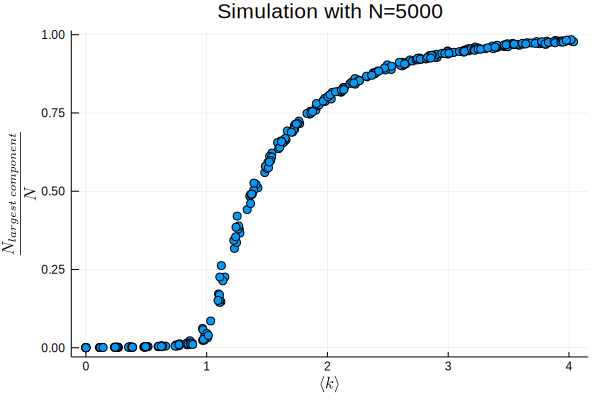

In [151]:
scatter(k,S,label="")
xlabel!(L"$\langle k \rangle$")
ylabel!(L"$\frac{N_{largest\; component}}{N}$")
title!("Simulation with N=$(N)")